<a href="https://colab.research.google.com/github/0001Toti/ESTUDIOS-MACHINE-LEARNING-UCJC/blob/main/INTRODUCCION_A_MACHINE_LEARNING_UCJC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducción al estudio de machine learning
Caso Práctico: proyecto y estudio de un dataset importado y estudio de cuatro modelos de machine learning

Alumno: Jesus María Morgado Lázaro.

Proyecto dataset
En esta libreta vamos a trabajar con datos obtenidos de la plataforma UCJC; son datos de una compañia el abandono de clientes

Se utilizara un fichero:

churn.xlsx



1.   INTRODUCCION



Vamos a explorar los datos almacenados en eL fichero, mencionado anteriormente.

In [48]:
#Importar las librerías relevantes para el tratamiento de archivos y gráficos
import io
import pandas as pd
import numpy as np

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score



2. Recolección de datos: Carga de datos



In [50]:
churn_data = pd.read_excel("churn.xlsx")

3. Exploración.

In [51]:
#nombre columnas
churn_data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [52]:
# Tamaño
churn_data.shape

(3333, 21)

In [53]:
#obtener valores nulos
churn_data.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

In [54]:
#listar columnas
list(churn_data.columns)

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn']

In [55]:
#tipoo variables
churn_data.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins          int64
Night Calls         int64
Night Charge        int64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn                bool
dtype: object

In [56]:
#Estadistica
churn_data.describe(include="all")

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3.333000e+03,3333.000000,3.333000e+03,...,3333.000000,3.333000e+03,3.333000e+03,3333.000000,3.333000e+03,3.333000e+03,3333.000000,3.333000e+03,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,382-4657,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,1.797751e+08,100.435644,3.056218e+07,...,100.114311,1.708354e+07,2.008720e+08,100.107711,9.039325e+06,1.023729e+07,4.479448,2.759463e+06,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,5.446739e+07,20.069084,9.259867e+06,...,19.922625,4.310668e+06,5.057385e+07,19.568609,2.275873e+06,2.791840e+06,2.461214,7.696694e+05,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,2.320000e+07,33.000000,1.040000e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,1.437000e+08,87.000000,2.443000e+07,...,87.000000,1.416000e+07,1.670000e+08,87.000000,7.520000e+06,8.500000e+06,3.000000,2.300000e+06,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,1.794000e+08,101.000000,3.050000e+07,...,100.000000,1.712000e+07,2.012000e+08,100.000000,9.050000e+06,1.030000e+07,4.000000,2.780000e+06,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,2.164000e+08,114.000000,3.679000e+07,...,114.000000,2.000000e+07,2.353000e+08,113.000000,1.059000e+07,1.210000e+07,6.000000,3.270000e+06,2.000000,NaN


from matplotlib import pyplot as plt
_df_0['Account Length'].plot(kind='hist', bins=20, title='Account Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Area Code'].plot(kind='hist', bins=20, title='Area Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['VMail Message'].plot(kind='hist', bins=20, title='VMail Message')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Day Mins'].plot(kind='hist', bins=20, title='Day Mins')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Phone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby("Int'l Plan").size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('VMail Plan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Account Length', y='Area Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Area Code', y='VMail Message', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='VMail Message', y='Day Mins', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Day Mins', y='Day Calls', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Account Length'].plot(kind='line', figsize=(8, 4), title='Account Length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Area Code'].plot(kind='line', figsize=(8, 4), title='Area Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['VMail Message'].plot(kind='line', figsize=(8, 4), title='VMail Message')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Day Mins'].plot(kind='line', figsize=(8, 4), title='Day Mins')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Phone'].value_counts()
    for x_label, grp in _df_16.groupby('State')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('State')
_ = plt.ylabel('Phone')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp["Int'l Plan"].value_counts()
    for x_label, grp in _df_17.groupby('Phone')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Phone')
_ = plt.ylabel("Int'l Plan")

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VMail Plan'].value_counts()
    for x_label, grp in _df_18.groupby("Int'l Plan")
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel("Int'l Plan")
_ = plt.ylabel('VMail Plan')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Account Length', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Phone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Account Length', y='Phone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21["Int'l Plan"].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Account Length', y="Int'l Plan", inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['VMail Plan'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Account Length', y='VMail Plan', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

4. Preparacion de los datos.


In [57]:
# Eliminar columnas irrelevantes para el análisis (si es necesario)
churn_data.drop(columns=['Phone'], inplace=True)

In [58]:
# Convertir columnas categóricas en variables dummy si es necesario
churn_data = pd.get_dummies(churn_data, columns=['State', 'Int\'l Plan', 'VMail Plan', 'Churn'], drop_first=True)

In [59]:
#listar columnas
list(churn_data.columns)

['Account Length',
 'Area Code',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'State_AL',
 'State_AR',
 'State_AZ',
 'State_CA',
 'State_CO',
 'State_CT',
 'State_DC',
 'State_DE',
 'State_FL',
 'State_GA',
 'State_HI',
 'State_IA',
 'State_ID',
 'State_IL',
 'State_IN',
 'State_KS',
 'State_KY',
 'State_LA',
 'State_MA',
 'State_MD',
 'State_ME',
 'State_MI',
 'State_MN',
 'State_MO',
 'State_MS',
 'State_MT',
 'State_NC',
 'State_ND',
 'State_NE',
 'State_NH',
 'State_NJ',
 'State_NM',
 'State_NV',
 'State_NY',
 'State_OH',
 'State_OK',
 'State_OR',
 'State_PA',
 'State_RI',
 'State_SC',
 'State_SD',
 'State_TN',
 'State_TX',
 'State_UT',
 'State_VA',
 'State_VT',
 'State_WA',
 'State_WI',
 'State_WV',
 'State_WY',
 "Int'l Plan_yes",
 'VMail Plan_yes',
 'Churn_True']

array([[<Axes: title={'center': 'Account Length'}>,
        <Axes: title={'center': 'Area Code'}>,
        <Axes: title={'center': 'VMail Message'}>,
        <Axes: title={'center': 'Day Mins'}>,
        <Axes: title={'center': 'Day Calls'}>,
        <Axes: title={'center': 'Day Charge'}>,
        <Axes: title={'center': 'Eve Mins'}>,
        <Axes: title={'center': 'Eve Calls'}>],
       [<Axes: title={'center': 'Eve Charge'}>,
        <Axes: title={'center': 'Night Mins'}>,
        <Axes: title={'center': 'Night Calls'}>,
        <Axes: title={'center': 'Night Charge'}>,
        <Axes: title={'center': 'Intl Mins'}>,
        <Axes: title={'center': 'Intl Calls'}>,
        <Axes: title={'center': 'Intl Charge'}>,
        <Axes: title={'center': 'CustServ Calls'}>],
       [<Axes: title={'center': 'State_AL'}>,
        <Axes: title={'center': 'State_AR'}>,
        <Axes: title={'center': 'State_AZ'}>,
        <Axes: title={'center': 'State_CA'}>,
        <Axes: title={'center': 'State_

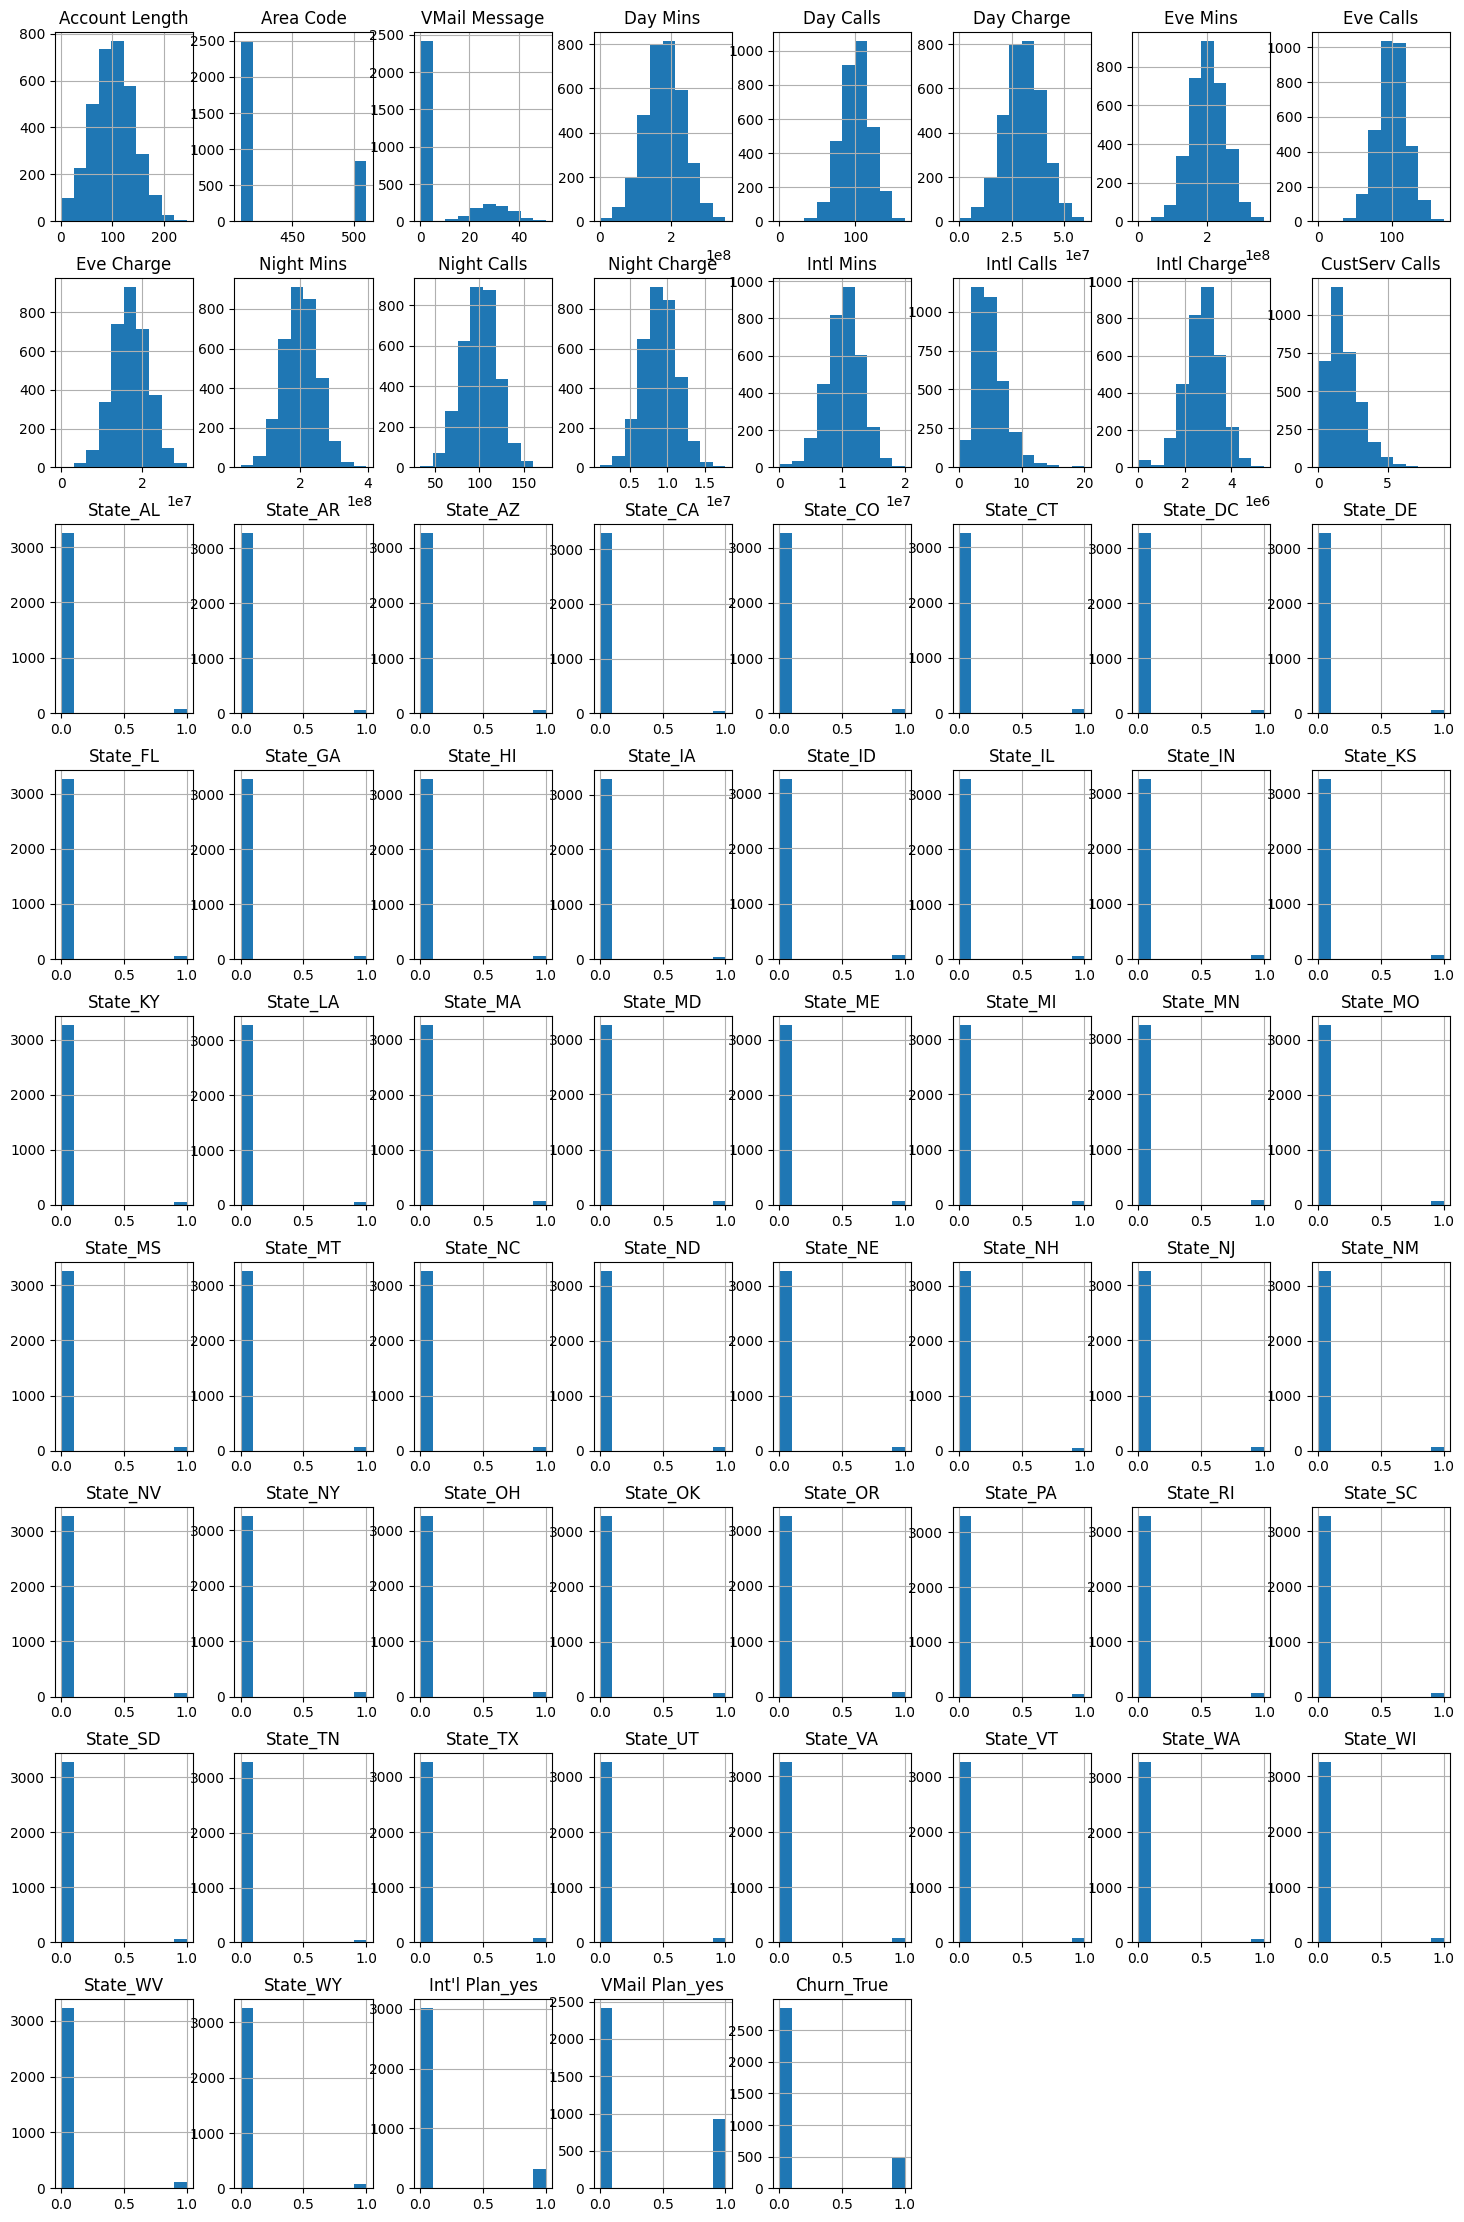

In [69]:
#Visualizar histogramas
churn_data.hist(figsize=(18,28))

In [60]:
# Separar las características (X) y la variable objetivo (y)
X = churn_data.drop(columns=['Churn_True'])
y = churn_data['Churn_True']

In [61]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Entrenamiento y evaluación de modelos

In [62]:
# Inicializar los modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [63]:
# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Logistic Regression
Accuracy: 0.85
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Model: Decision Tree
Accuracy: 0.92
Precision: 0.75
Recall: 0.73
F1 Score: 0.74

Model: Random Forest
Accuracy: 0.93
Precision: 0.95
Recall: 0.57
F1 Score: 0.72

Model: Gradient Boosting
Accuracy: 0.95
Precision: 0.94
Recall: 0.72
F1 Score: 0.82



5. Validacion cruzada

In [65]:
    # Validación cruzada
    from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Assuming model, X, and y are defined
model = LinearRegression()

# Assuming X and y are defined
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.2f}")
print("---------------------------------------------------------")

Cross-validation scores: [0.11979357 0.0806991  0.16179819 0.20289088 0.20331661]
Mean CV accuracy: 0.15
---------------------------------------------------------
